In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [17]:
day_0 = pd.read_csv("prices_round_2_day_-1.csv", sep=";") # day -1
day_1 = pd.read_csv("prices_round_2_day_0.csv", sep=";")
day_2 = pd.read_csv("prices_round_2_day_1.csv", sep=";")

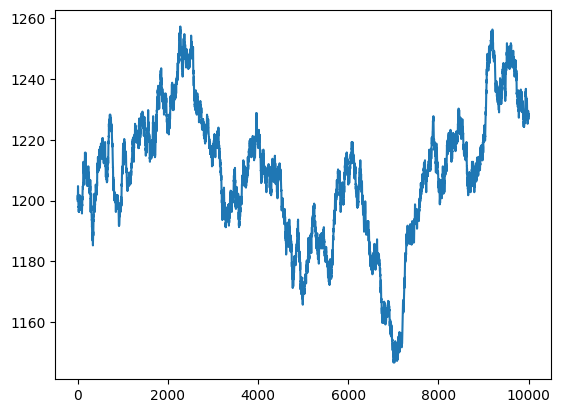

0.6588011815363257
0.632491587206427


In [18]:
plt.plot(day_0['ORCHIDS'])
plt.show()

print(day_0['HUMIDITY'].corr(day_0['ORCHIDS']))
print(day_0['SUNLIGHT'].corr(day_0['ORCHIDS']))

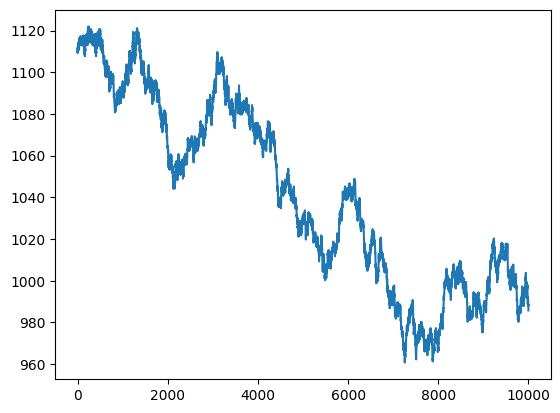

0.7620235872114739
0.7226423083818772


In [19]:
plt.plot(day_1['ORCHIDS'])
plt.show()
print(day_1['HUMIDITY'].corr(day_1['ORCHIDS']))
print(day_1['SUNLIGHT'].corr(day_1['ORCHIDS']))

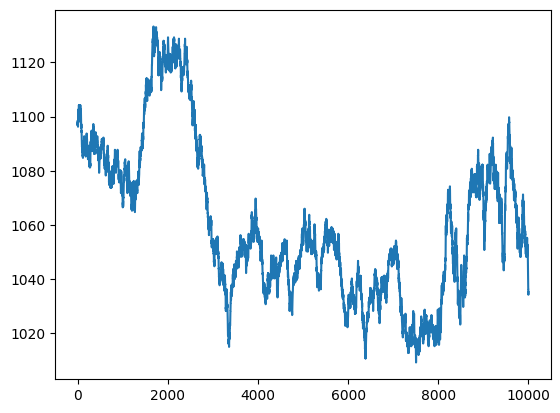

0.6227634039862769
-0.4101923746533346


In [20]:
plt.plot(day_2['ORCHIDS'])
plt.show()
print(day_2['HUMIDITY'].corr(day_2['ORCHIDS']))
print(day_2['SUNLIGHT'].corr(day_2['ORCHIDS']))

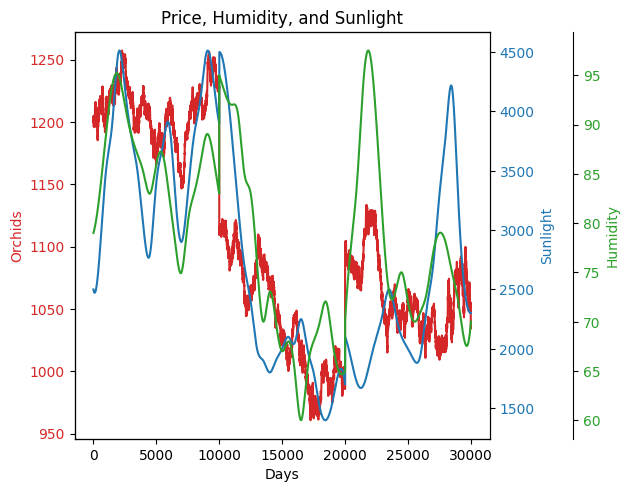

0.7100657475704435
0.7156920789197552


In [21]:
all_days = pd.concat([day_0,day_1,day_2], ignore_index=True)
fig, ax1 = plt.subplots()

# Plot "ORCHIDS" on the first y-axis.
color = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('Orchids', color=color)
ax1.plot(all_days.index, all_days['ORCHIDS'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for "SUNLIGHT".
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Sunlight', color=color)
ax2.plot(all_days.index, all_days['SUNLIGHT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for "HUMIDITY".
ax3 = ax1.twinx()
color = 'tab:green'
# Offset the right spine of ax3. The ticks and label have already been set above.
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to the right.
ax3.set_ylabel('Humidity', color=color)
ax3.plot(all_days.index, all_days['HUMIDITY'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Adjust layout to prevent overlap
plt.title("Price, Humidity, and Sunlight")
plt.show()
print(all_days['HUMIDITY'].corr(all_days['ORCHIDS']))
print(all_days['SUNLIGHT'].corr(all_days['ORCHIDS']))

In [22]:
print(all_days.info)

<bound method DataFrame.info of        timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0              0  1200.00             1.5           10.5           -2.0   
1            100  1201.75             1.5            9.5           -2.0   
2            200  1201.75             1.5            9.5           -2.0   
3            300  1201.75             1.5            9.5           -2.0   
4            400  1201.75             1.5            9.5           -2.0   
...          ...      ...             ...            ...            ...   
29998     999600  1036.25             0.9            9.5           -5.0   
29999     999700  1036.25             0.9            9.5           -5.0   
30000     999800  1036.25             0.9            9.5           -5.0   
30001     999900  1034.25             0.9            9.5           -5.0   
30002    1000000  1035.25             0.9            9.5           -5.0   

        SUNLIGHT  HUMIDITY  DAY  
0      2500.0000  79.00000   -1  

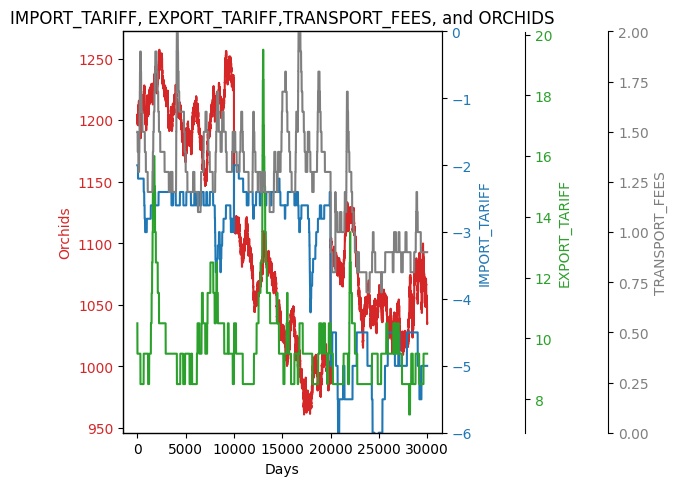

0.7100657475704435
0.7156920789197552


In [23]:
all_days = pd.concat([day_0,day_1,day_2], ignore_index=True)
fig, ax1 = plt.subplots(sharey=True)

# Plot "ORCHIDS" on the first y-axis.
color = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('Orchids', color=color)
ax1.plot(all_days.index, all_days['ORCHIDS'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for "SUNLIGHT".
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('IMPORT_TARIFF', color=color)
ax2.plot(all_days.index, all_days['IMPORT_TARIFF'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-6,0])


# Create a third y-axis for "HUMIDITY".
ax3 = ax1.twinx()
color = 'tab:green'
# Offset the right spine of ax3. The ticks and label have already been set above.
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to the right.
ax3.set_ylabel('EXPORT_TARIFF', color=color)
ax3.plot(all_days.index, all_days['EXPORT_TARIFF'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for "HUMIDITY".
ax3 = ax1.twinx()
color = 'tab:grey'
# Offset the right spine of ax3. The ticks and label have already been set above.
ax3.spines['right'].set_position(('outward', 120))  # Offset the third axis to the right.
ax3.set_ylabel('TRANSPORT_FEES', color=color)
ax3.plot(all_days.index, all_days['TRANSPORT_FEES'], color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim([0,2])

fig.tight_layout()  # Adjust layout to prevent overlap
plt.title("IMPORT_TARIFF, EXPORT_TARIFF,TRANSPORT_FEES, and ORCHIDS")
plt.show()
print(all_days['HUMIDITY'].corr(all_days['ORCHIDS']))
print(all_days['SUNLIGHT'].corr(all_days['ORCHIDS']))

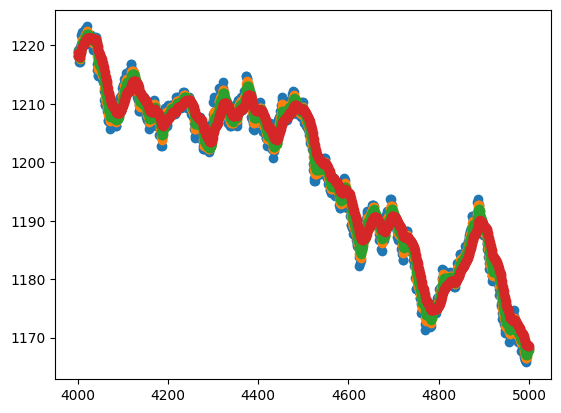

In [24]:
# analyze day 1 orchid price information
window = 2
day_0 = day_0[4000:5000]

day_0[f'ORCHID_EMA_{window}'] = day_0['ORCHIDS'].ewm(window).mean().fillna(0)
day_0[f'ORCHID_EMA_{2*window}'] = day_0['ORCHIDS'].ewm(2*window).mean().fillna(0)
day_0[f'ORCHID_EMA_{6*window}'] = day_0['ORCHIDS'].ewm(6*window).mean().fillna(0)


plt.scatter(day_0.index, day_0['ORCHIDS'])
plt.scatter(day_0.index, day_0[f'ORCHID_EMA_{window}'])
plt.scatter(day_0.index,day_0[f'ORCHID_EMA_{2*window}'])
plt.scatter(day_0.index,day_0[f'ORCHID_EMA_{6*window}'])
plt.show()


In [25]:
day_0['Pct_change'] = day_0['ORCHIDS'].pct_change().fillna(0) * 100
print(day_0['Pct_change'].head())

4000    0.000000
4001    0.082085
4002   -0.082018
4003    0.000000
4004   -0.082085
Name: Pct_change, dtype: float64


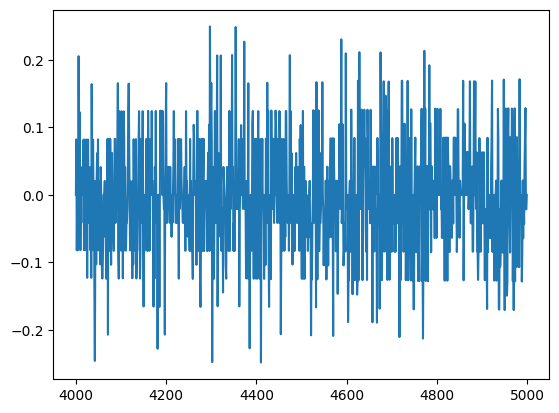

In [26]:
plt.plot(day_0['Pct_change'])
plt.show()

In [27]:
day_0[f'ORCHID_STDEV_30'] = day_0['ORCHIDS'].rolling(15).std().fillna(0)
print(day_0[:100])

      timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
4000     400000  1218.25             1.2            9.5           -2.6   
4001     400100  1219.25             1.2            9.5           -2.6   
4002     400200  1218.25             1.2            9.5           -2.6   
4003     400300  1218.25             1.3            9.5           -2.6   
4004     400400  1217.25             1.3            9.5           -2.6   
...         ...      ...             ...            ...            ...   
4095     409500  1208.75             2.1            8.5           -2.6   
4096     409600  1210.25             2.1            8.5           -2.6   
4097     409700  1210.50             2.1            8.5           -2.6   
4098     409800  1211.75             2.1            8.5           -2.6   
4099     409900  1212.75             2.1            8.5           -2.6   

       SUNLIGHT   HUMIDITY  DAY  ORCHID_EMA_2  ORCHID_EMA_4  ORCHID_EMA_12  \
4000  3000.0000  85.000000   -1  

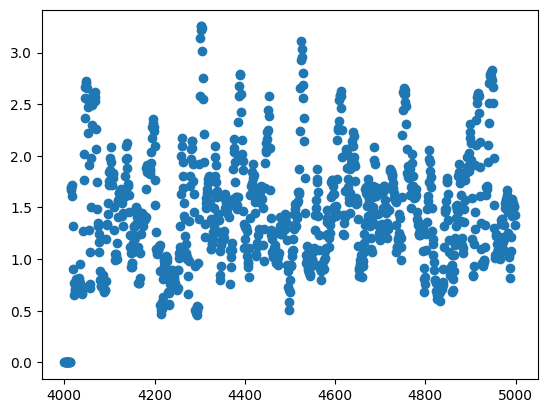

In [28]:
plt.scatter(day_0.index, day_0['ORCHID_STDEV_30'])
plt.show()

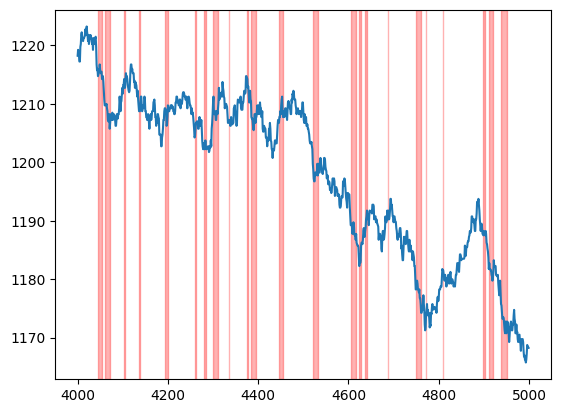

In [29]:
plt.plot(day_0['ORCHIDS'])
start_holding = None
end_holding = None
std_above_threshold = day_0['ORCHID_STDEV_30'] > 2
for idx in day_0.index:
    if std_above_threshold[idx] == True:
        if not start_holding:
            start_holding = idx
    else:
        if start_holding:
            end_holding = idx
            # Plot the holding period in red overlay
            plt.axvspan(start_holding, end_holding, color='red', alpha=0.3)

            start_holding = None
            end_holding = None
plt.show()

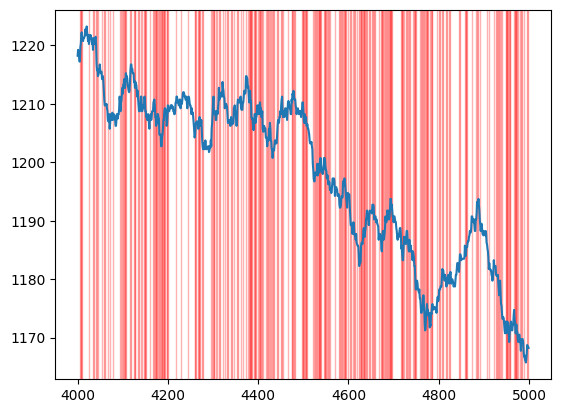

In [30]:
plt.plot(day_0['ORCHIDS'])
start_holding = None
end_holding = None
std_above_threshold = day_0['Pct_change'].abs() > .1
for idx in day_0.index:
    if std_above_threshold[idx] == True:
        if not start_holding:
            start_holding = idx
    else:
        if start_holding:
            end_holding = idx
            # Plot the holding period in red overlay
            plt.axvspan(start_holding, end_holding, color='red', alpha=0.3)

            start_holding = None
            end_holding = None
plt.show()

### Analyze Log of price

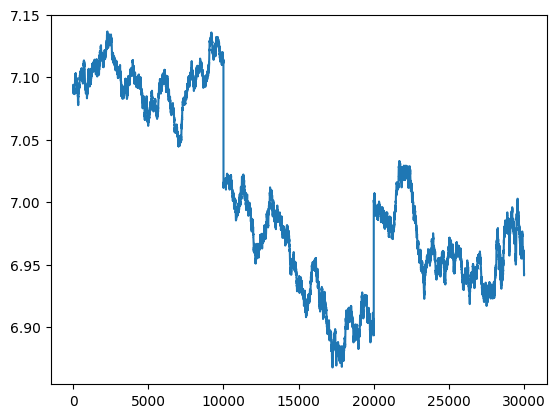

In [34]:
all_days['Log_PX'] = np.log(all_days['ORCHIDS'])
plt.plot(all_days['Log_PX'])

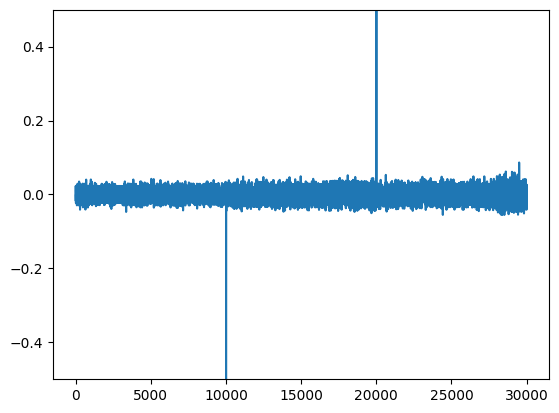

In [42]:
plt.plot(all_days['Log_PX'].pct_change() * 100)
plt.ylim([-.5,.5])
plt.show()

### Now try and use the humidity and sunlight to predict orchid price